# **Data Ingestion, Cleaning, and Physics Embedding**

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import io

# ==========================================
# 0. DATA INGESTION (Creating the file for Colab)
# ==========================================
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""
# Read string as if it were the uploaded CSV file
df = pd.read_csv(io.StringIO(csv_content))

# ==========================================
# 1. LOAD AND CLEAN
# ==========================================
print("--- STEP 1: Data Cleaning ---")
# Strip whitespace from Material names (critical fix for 'CoCrFeNiMn ')
df['Material'] = df['Material'].str.strip()

# Filter out failed runs (Zeros in Stress or Flux)
# We check if Von Mises > 0 AND Heat flux > 0
df_clean = df[
    (df['Y2_Max_Von_Mises'] > 1e-6) &
    (df['Heat flux'] > 1e-6)
].copy()

print(f"Original Shape: {df.shape}")
print(f"Cleaned Shape:  {df_clean.shape}")
assert df_clean.shape[0] == 45, "Error: Cleaning did not result in 45 rows."

# ==========================================
# 2. FEATURE ENGINEERING (The "Physics Switch")
# ==========================================
print("\n--- STEP 2: Feature Engineering ---")

USE_PHYSICS_EMBEDDING = True

# Define Base Inputs and Outputs
process_params = ['Power_W/mm2', 'Speed_mm/s', 'Radius_mm']
output_cols = ['Y1_Max_Prin_Stress (MPa)', 'Y2_Max_Von_Mises', 'Y3_Deformation mm', 'Max Temp', 'Heat flux']

if USE_PHYSICS_EMBEDDING:
    print("Mode: Physics Embedding Enabled (Mapping Materials to Vectors)")
    # Density (kg/m3), Conductivity (W/mK), Specific Heat (J/kgK)
    material_props = {
        'CoCrFeNiMn': [8250, 12.5, 425],
        'AlCoCrFeNi': [8000, 15.0, 445],
        'FeCrNiTiAl': [8100, 15.0, 435],
        'NbSiTaTiZr': [8350, 10.0, 405],
        'HfNbTiZr':   [8450, 8.5,  395]
    }

    # Map properties to new columns
    props_df = pd.DataFrame(
        df_clean['Material'].map(material_props).tolist(),
        index=df_clean.index,
        columns=['Density', 'Conductivity', 'Cp']
    )

    # Concatenate process params with physics props
    X_data = pd.concat([df_clean[process_params], props_df], axis=1)

else:
    print("Mode: One-Hot Encoding Enabled")
    # Reshape for sklearn
    mat_array = df_clean[['Material']].values
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_mats = encoder.fit_transform(mat_array)

    # Create DataFrame for encoded features
    encoded_df = pd.DataFrame(
        encoded_mats,
        columns=encoder.get_feature_names_out(['Material']),
        index=df_clean.index
    )

    # Concatenate process params with one-hot vectors
    X_data = pd.concat([df_clean[process_params], encoded_df], axis=1)

y_data = df_clean[output_cols]

print(f"Input Features Shape: {X_data.shape}")
print(f"Features used: {list(X_data.columns)}")

# ==========================================
# 3. NORMALIZATION & TENSOR CONVERSION
# ==========================================
print("\n--- STEP 3: Normalization & PyTorch Conversion ---")

# Initialize Scalers
# MinMaxScaler for Inputs (Physics boundaries usually have fixed ranges)
X_scaler = MinMaxScaler()
# StandardScaler for Outputs (Better for GP/NN convergence to handle target variance)
y_scaler = StandardScaler()

# Fit and Transform
X_scaled = X_scaler.fit_transform(X_data)
y_scaled = y_scaler.fit_transform(y_data)

# Convert to PyTorch Tensors (float32 is standard for ML)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

print("Final Tensor Shapes:")
print(f"X_tensor: {X_tensor.shape}")
print(f"y_tensor: {y_tensor.shape}")

# Verify a sample (First row)
print("\nSample Data (Row 0 - Scaled):")
print(f"Input: {X_tensor[0]}")
print(f"Output: {y_tensor[0]}")

--- STEP 1: Data Cleaning ---
Original Shape: (50, 10)
Cleaned Shape:  (45, 10)

--- STEP 2: Feature Engineering ---
Mode: Physics Embedding Enabled (Mapping Materials to Vectors)
Input Features Shape: (45, 6)
Features used: ['Power_W/mm2', 'Speed_mm/s', 'Radius_mm', 'Density', 'Conductivity', 'Cp']

--- STEP 3: Normalization & PyTorch Conversion ---
Final Tensor Shapes:
X_tensor: torch.Size([45, 6])
y_tensor: torch.Size([45, 5])

Sample Data (Row 0 - Scaled):
Input: tensor([0.3476, 0.0000, 1.0000, 0.5556, 0.6154, 0.6000])
Output: tensor([2.3827, 1.7000, 1.2333, 2.7019, 2.5796])


# **GPyTorch MOGP Implementation**

In [ ]:
!pip install gpytorch
# ^ UNCOMMENT THE ABOVE LINE IF RUNNING IN COLAB

import torch
import gpytorch
import pandas as pd
import numpy as np
import io
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# ==========================================
# 0. DATA INGESTION
# ==========================================
# (This block reconstructs the dataset for reproducibility)
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""
df = pd.read_csv(io.StringIO(csv_content))

# ==========================================
# 1. DATA CLEANING & PREPROCESSING
# ==========================================
print("--- Step 1: Data Processing ---")
df['Material'] = df['Material'].str.strip()
# Remove failed runs
df_clean = df[(df['Y2_Max_Von_Mises'] > 1e-6) & (df['Heat flux'] > 1e-6)].copy()
print(f"Cleaned dataset shape: {df_clean.shape}") # Should be (45, 10)

# Feature Engineering
USE_PHYSICS_EMBEDDING = True
process_params = ['Power_W/mm2', 'Speed_mm/s', 'Radius_mm']
output_cols = ['Y1_Max_Prin_Stress (MPa)', 'Y2_Max_Von_Mises', 'Y3_Deformation mm', 'Max Temp', 'Heat flux']

if USE_PHYSICS_EMBEDDING:
    material_props = {
        'CoCrFeNiMn': [8250, 12.5, 425],
        'AlCoCrFeNi': [8000, 15.0, 445],
        'FeCrNiTiAl': [8100, 15.0, 435],
        'NbSiTaTiZr': [8350, 10.0, 405],
        'HfNbTiZr':   [8450, 8.5,  395]
    }
    props_df = pd.DataFrame(
        df_clean['Material'].map(material_props).tolist(),
        index=df_clean.index, columns=['Density', 'Conductivity', 'Cp']
    )
    X_data = pd.concat([df_clean[process_params], props_df], axis=1)
else:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_mats = encoder.fit_transform(df_clean[['Material']])
    encoded_df = pd.DataFrame(encoded_mats, index=df_clean.index)
    X_data = pd.concat([df_clean[process_params], encoded_df], axis=1)

y_data = df_clean[output_cols]

# Normalization
X_scaler = MinMaxScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X_data)
y_scaled = y_scaler.fit_transform(y_data)

# Convert to Tensors
train_x = torch.tensor(X_scaled, dtype=torch.float32)
train_y = torch.tensor(y_scaled, dtype=torch.float32)

# ==========================================
# 2. GPYTORCH MULTI-OUTPUT MODEL
# ==========================================
print("\n--- Step 2: Building MOGP Model ---")

class MOGP_Surrogate(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MOGP_Surrogate, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=5
        )

        # ICM Kernel: Scale * Matern(Spatial) (x) IndexKernel(Task)
        # We define the spatial kernel (data_covar_module) first
        data_covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=train_x.size(-1))
        )

        # MultitaskKernel combines the data kernel with an IndexKernel internally
        # rank=1 implies the tasks are highly correlated (common latent functions)
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            data_covar_module, num_tasks=5, rank=1
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

    def predict(self, X_new):
        """
        Predicts mean and variance for new inputs.
        X_new: numpy array or tensor of scaled inputs.
        Returns: unscaled_means (numpy), unscaled_variances (numpy)
        """
        self.eval()
        self.likelihood.eval()

        if not torch.is_tensor(X_new):
            X_new = torch.tensor(X_new, dtype=torch.float32)

        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            # The output of the model is a MultitaskMultivariateNormal
            predictions = self.likelihood(self(X_new))
            mean = predictions.mean
            variance = predictions.variance

            # Un-scale predictions
            # Means can be inversely transformed directly
            unscaled_mean = y_scaler.inverse_transform(mean.numpy())

            # Variances must be unscaled by the square of the scale (std^2)
            # shape of variance is (N, 5), y_scaler.scale_ is (5,)
            unscaled_variance = variance.numpy() * (y_scaler.scale_ ** 2)

            return unscaled_mean, unscaled_variance

# Initialize Model and Likelihood
likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=5)
model = MOGP_Surrogate(train_x, train_y, likelihood)

# ==========================================
# 3. TRAINING ROUTINE
# ==========================================
print("\n--- Step 3: Training ---")
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_epochs = 500
for i in range(num_epochs):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

    if (i + 1) % 50 == 0:
        print(f'Epoch {i+1}/{num_epochs} - Loss: {loss.item():.3f}')

# ==========================================
# 4. PREDICTION EXAMPLE
# ==========================================
print("\n--- Step 4: Prediction ---")
# Example: Predict on the first training point to verify fit
test_point = train_x[0:1] # Shape (1, 6)
pred_means, pred_vars = model.predict(test_point)

print("True Values (Row 1):")
print(y_scaler.inverse_transform(train_y[0:1].numpy()))
print("Predicted Values (Row 1):")
print(pred_means)
print("Predicted Variances:")
print(pred_vars)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.6/280.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.9 MB/s eta 0:00:00
--- Step 1: Data Processing ---
Cleaned dataset shape: (45, 10)

--- Step 2: Building MOGP Model ---

--- Step 3: Training ---
Epoch 50/500 - Loss: -0.409
Epoch 100/500 - Loss: -0.700
Epoch 150/500 - Loss: -0.744
Epoch 200/500 - Loss: -0.753
Epoch 250/500 - Loss: -0.756
Epoch 300/500 - Loss: -0.760
Epoch 350/500 - Loss: -0.762
Epoch 400/500 - Loss: -0.767
Epoch 450/500 - Loss: -0.770
Epoch 500/500 - Loss: -0.773

--- Step 4: Prediction ---
True Values (Row 1):
[[3.5594998e+02 1.3602000e+03 1.7200001e-02 2.5523999e+02 4.1929999e-01]]
Predicted Values (Row 1):
[[3.9211258e+02 1.8601086e+03 2.8289195e-02 2.5527184e+02 4.1929653e-01]]
Predicted Variances:
[[1.10731527e+02 8.80967678e+03 4.41901189e-06 2.91589070e+00
  1.98670485e-05]]


# **Ensemble Stacking Implementation**

In [ ]:
!pip install xgboost
# ^ UNCOMMENT IF RUNNING IN AN ENVIRONMENT WITHOUT XGBOOST (Standard in Colab)

import pandas as pd
import numpy as np
import io
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

# ==========================================
# 1. DATA PREPARATION (Reproducing cleaned dataset)
# ==========================================
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""
df = pd.read_csv(io.StringIO(csv_content))
df['Material'] = df['Material'].str.strip()

# Filter Clean Data
df_clean = df[(df['Y2_Max_Von_Mises'] > 1e-6) & (df['Heat flux'] > 1e-6)].copy()

# Physics Embedding
material_props = {
    'CoCrFeNiMn': [8250, 12.5, 425],
    'AlCoCrFeNi': [8000, 15.0, 445],
    'FeCrNiTiAl': [8100, 15.0, 435],
    'NbSiTaTiZr': [8350, 10.0, 405],
    'HfNbTiZr':   [8450, 8.5,  395]
}
props_df = pd.DataFrame(
    df_clean['Material'].map(material_props).tolist(),
    index=df_clean.index, columns=['Density', 'Conductivity', 'Cp']
)
process_params = ['Power_W/mm2', 'Speed_mm/s', 'Radius_mm']

# X_train and y_train Definition
X_train = pd.concat([df_clean[process_params], props_df], axis=1)
y_train = df_clean[['Y1_Max_Prin_Stress (MPa)', 'Y2_Max_Von_Mises', 'Y3_Deformation mm', 'Max Temp', 'Heat flux']]

print(f"Training Data Shape: {X_train.shape}")

# ==========================================
# 2. STACKING REGRESSOR ARCHITECTURE
# ==========================================
print("Initializing Stacking Ensembles...")

# Level-0 Base Estimators
estimators = [
    ('RF', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('XGB', XGBRegressor(objective='reg:squarederror', n_estimators=200)),
    ('SVR', SVR(kernel='rbf', C=10.0, epsilon=0.1))
]

# Stacking Definition (Level 1: RidgeCV)
# StackingRegressor natively handles only single-output.
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)

# MultiOutput Wrapper
# This creates 5 separate StackingRegressors, one for each physics output.
multi_output_stack = MultiOutputRegressor(stacking_reg)

# ==========================================
# 3. PIPELINE & FITTING
# ==========================================
# Create Pipeline with Scaling
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),          # Normalize inputs for SVR/Ridge
    ('model', multi_output_stack)
])

# Fit Model
print("Fitting model on X_train, y_train (this may take a moment)...")
pipeline.fit(X_train, y_train)
print("Fitting complete.")

# ==========================================
# 4. VALIDATION (Sanity Check)
# ==========================================
print("\n--- Model Validation ---")
# Predict on training set to check fit quality
y_pred = pipeline.predict(X_train)

# Calculate R2 Score
train_r2 = r2_score(y_train, y_pred)
print(f"Training R^2 Score: {train_r2:.4f}")

# Comparison of first row
print("\nSample Prediction (First Row):")
print(f"Predicted: {y_pred[0]}")
print(f"Actual:    {y_train.iloc[0].values}")

Training Data Shape: (45, 6)
Initializing Stacking Ensembles...
Fitting model on X_train, y_train (this may take a moment)...
Fitting complete.

--- Model Validation ---
Training R^2 Score: 0.8161

Sample Prediction (First Row):
Predicted: [3.74878334e+02 1.54490990e+03 7.92117883e-03 2.55970285e+02
 3.98401378e-01]
Actual:    [3.5595e+02 1.3602e+03 1.7200e-02 2.5524e+02 4.1930e-01]


# **Validation and Global Sensitivity Analysis**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 11.8 MB/s eta 0:00:00
--- Starting 10-Fold CV ---

--- GP Validation Metrics ---
Stress: R2=0.989, RMSE=11.740
VonMises: R2=0.954, RMSE=112.127
Def: R2=0.904, RMSE=0.002
Temp: R2=0.998, RMSE=2.649
Flux: R2=0.997, RMSE=0.006


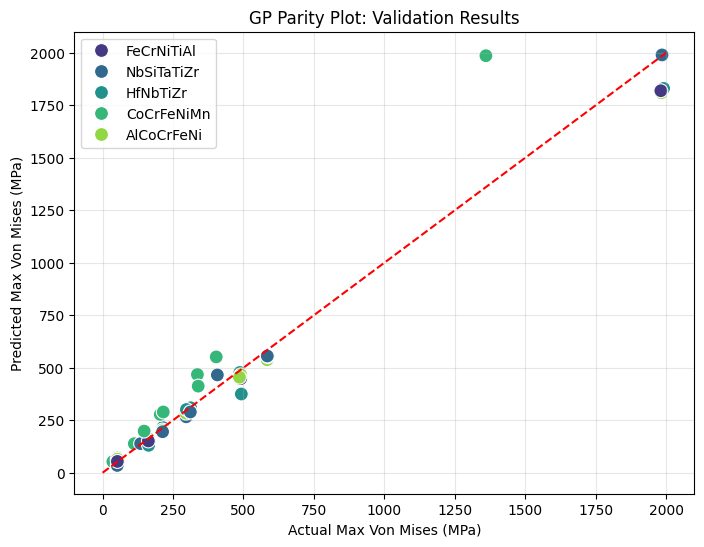


--- Running Global Sensitivity Analysis ---
Training Final GP for GSA...


/tmp/ipython-input-1879472089.py:236: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2048) # 2048 * (2*6 + 2) samples


Generated 28672 samples for analysis.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


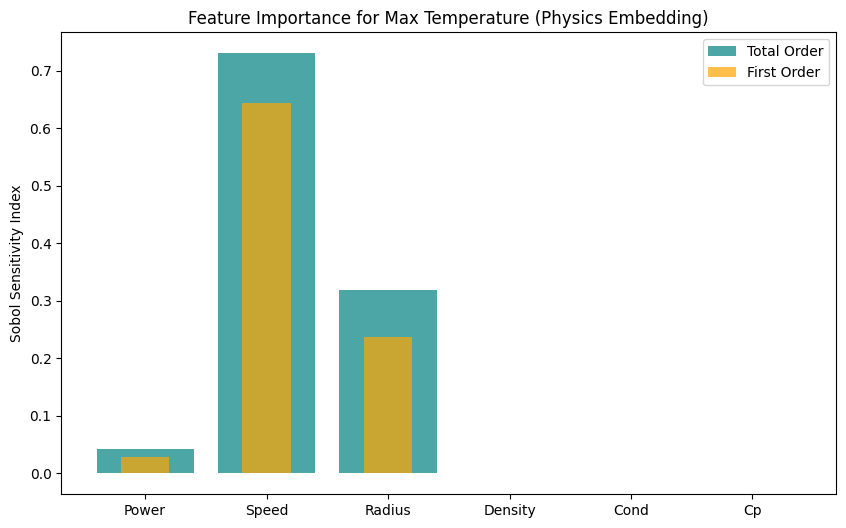


Total Order Indices (ST):
Power: 0.0429
Speed: 0.7304
Radius: 0.3187
Density: 0.0002
Cond: 0.0000
Cp: 0.0001


In [ ]:
!pip install SALib gpytorch xgboost
# ^ UNCOMMENT ABOVE LINE IN COLAB

import torch
import gpytorch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from SALib.sample import saltelli
from SALib.analyze import sobol

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# ==========================================
# 0. DATA INGESTION & PREP
# ==========================================
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""
df = pd.read_csv(io.StringIO(csv_content))
df['Material'] = df['Material'].str.strip()
df_clean = df[(df['Y2_Max_Von_Mises'] > 1e-6) & (df['Heat flux'] > 1e-6)].copy()

# Physics Embedding
material_props = {
    'CoCrFeNiMn': [8250, 12.5, 425],
    'AlCoCrFeNi': [8000, 15.0, 445],
    'FeCrNiTiAl': [8100, 15.0, 435],
    'NbSiTaTiZr': [8350, 10.0, 405],
    'HfNbTiZr':   [8450, 8.5,  395]
}
props_df = pd.DataFrame(df_clean['Material'].map(material_props).tolist(),
                        index=df_clean.index, columns=['Density', 'Conductivity', 'Cp'])
X_raw = pd.concat([df_clean[['Power_W/mm2', 'Speed_mm/s', 'Radius_mm']], props_df], axis=1)
y_raw = df_clean[['Y1_Max_Prin_Stress (MPa)', 'Y2_Max_Von_Mises', 'Y3_Deformation mm', 'Max Temp', 'Heat flux']]

# ==========================================
# 1. MODEL DEFINITIONS
# ==========================================
class MOGP_Surrogate(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MOGP_Surrogate, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(gpytorch.means.ConstantMean(), num_tasks=5)
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=6)),
            num_tasks=5, rank=1
        )
    def forward(self, x):
        return gpytorch.distributions.MultitaskMultivariateNormal(self.mean_module(x), self.covar_module(x))

def get_stacking_model():
    estimators = [
        ('RF', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGB', XGBRegressor(objective='reg:squarederror', n_estimators=100)),
        ('SVR', SVR(kernel='rbf', C=10.0, epsilon=0.1))
    ]
    return MultiOutputRegressor(StackingRegressor(estimators=estimators, final_estimator=RidgeCV()))

# ==========================================
# 2. 10-FOLD CROSS-VALIDATION
# ==========================================
print("--- Starting 10-Fold CV ---")
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Storage for predictions
stacking_preds, gp_preds, y_trues = [], [], []
materials_list = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_raw)):
    # Split Data
    X_tr, X_te = X_raw.iloc[train_idx], X_raw.iloc[test_idx]
    y_tr, y_te = y_raw.iloc[train_idx], y_raw.iloc[test_idx]
    materials_list.extend(df_clean.iloc[test_idx]['Material'].values)

    # Scaling
    X_scaler = MinMaxScaler().fit(X_tr)
    y_scaler = StandardScaler().fit(y_tr)

    X_tr_sc = X_scaler.transform(X_tr)
    X_te_sc = X_scaler.transform(X_te)
    y_tr_sc = y_scaler.transform(y_tr)

    # --- Train Stacking ---
    stacking = get_stacking_model()
    stacking.fit(X_tr_sc, y_tr_sc)
    s_pred_sc = stacking.predict(X_te_sc)
    stacking_preds.append(y_scaler.inverse_transform(s_pred_sc))

    # --- Train GP ---
    tr_x_tens = torch.tensor(X_tr_sc, dtype=torch.float32)
    tr_y_tens = torch.tensor(y_tr_sc, dtype=torch.float32)
    likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=5)
    model = MOGP_Surrogate(tr_x_tens, tr_y_tens, likelihood)

    model.train(); likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for _ in range(100): # Reduced epochs for CV speed
        optimizer.zero_grad()
        loss = -mll(model(tr_x_tens), tr_y_tens)
        loss.backward()
        optimizer.step()

    model.eval(); likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        gp_out = likelihood(model(torch.tensor(X_te_sc, dtype=torch.float32)))
        gp_preds.append(y_scaler.inverse_transform(gp_out.mean.numpy()))

    y_trues.append(y_te.values)

# Concatenate Results
y_true_all = np.vstack(y_trues)
gp_pred_all = np.vstack(gp_preds)
stack_pred_all = np.vstack(stacking_preds)

# Calculate Metrics for GP
print("\n--- GP Validation Metrics ---")
metrics = ['Stress', 'VonMises', 'Def', 'Temp', 'Flux']
for i, name in enumerate(metrics):
    r2 = r2_score(y_true_all[:, i], gp_pred_all[:, i])
    rmse = np.sqrt(mean_squared_error(y_true_all[:, i], gp_pred_all[:, i]))
    print(f"{name}: R2={r2:.3f}, RMSE={rmse:.3f}")

# Parity Plot (Max Von Mises)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true_all[:, 1], y=gp_pred_all[:, 1], hue=materials_list, s=100, palette='viridis')
plt.plot([0, 2000], [0, 2000], 'r--')
plt.xlabel('Actual Max Von Mises (MPa)')
plt.ylabel('Predicted Max Von Mises (MPa)')
plt.title('GP Parity Plot: Validation Results')
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================
# 3. GLOBAL SENSITIVITY ANALYSIS (SOBOL)
# ==========================================
print("\n--- Running Global Sensitivity Analysis ---")

# Retrain GP on FULL dataset for Physics Analysis
X_scaler = MinMaxScaler().fit(X_raw)
y_scaler = StandardScaler().fit(y_raw)
X_full_sc = torch.tensor(X_scaler.transform(X_raw), dtype=torch.float32)
y_full_sc = torch.tensor(y_scaler.transform(y_raw), dtype=torch.float32)

likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=5)
model = MOGP_Surrogate(X_full_sc, y_full_sc, likelihood)
model.train(); likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

print("Training Final GP for GSA...")
for i in range(300):
    optimizer.zero_grad()
    loss = -mll(model(X_full_sc), y_full_sc)
    loss.backward()
    optimizer.step()

# Define Problem
problem = {
    'num_vars': 6,
    'names': ['Power', 'Speed', 'Radius', 'Density', 'Cond', 'Cp'],
    'bounds': [
        [50, 300],   # Power
        [5, 50],     # Speed
        [0.8, 1.5],  # Radius
        [8000, 8500],# Density
        [8.0, 16.0], # Conductivity
        [390, 450]   # Cp
    ]
}

# Sample
param_values = saltelli.sample(problem, 2048) # 2048 * (2*6 + 2) samples
print(f"Generated {param_values.shape[0]} samples for analysis.")

# Predict
model.eval(); likelihood.eval()
# Note: MOGP outputs 5 vars. We care about 'Max Temp' (Index 3)
# We must scale inputs -> predict -> unscale output
inputs_scaled = X_scaler.transform(param_values)
inputs_tensor = torch.tensor(inputs_scaled, dtype=torch.float32)

# Batch prediction to avoid OOM
Y_mean_all = []
batch_size = 1000
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    for i in range(0, len(inputs_tensor), batch_size):
        batch = inputs_tensor[i:i+batch_size]
        out = likelihood(model(batch))
        # Unscale: (val * scale) + mean
        # We only need Temp (Index 3)
        temp_sc = out.mean[:, 3].numpy()
        temp_real = temp_sc * y_scaler.scale_[3] + y_scaler.mean_[3]
        Y_mean_all.append(temp_real)

Y_pred_temp = np.concatenate(Y_mean_all)

# Analyze
Si = sobol.analyze(problem, Y_pred_temp)

# Plot Sobol Indices
plt.figure(figsize=(10, 6))
plt.bar(problem['names'], Si['ST'], color='teal', alpha=0.7, label='Total Order')
plt.bar(problem['names'], Si['S1'], color='orange', alpha=0.7, label='First Order', width=0.4)
plt.ylabel('Sobol Sensitivity Index')
plt.title('Feature Importance for Max Temperature (Physics Embedding)')
plt.legend()
plt.show()

print("\nTotal Order Indices (ST):")
for name, val in zip(problem['names'], Si['ST']):
    print(f"{name}: {val:.4f}")

# **High quality pdf output**

--- Running 10-Fold Cross-Validation ---
Fold 1/10 Complete.
Fold 2/10 Complete.
Fold 3/10 Complete.
Fold 4/10 Complete.
Fold 5/10 Complete.
Fold 6/10 Complete.
Fold 7/10 Complete.
Fold 8/10 Complete.
Fold 9/10 Complete.
Fold 10/10 Complete.

--- Validation Metrics (R2 Scores) ---
Y1_Max_Prin_Stress (MPa): 0.9899
Y2_Max_Von_Mises: 0.9556
Y3_Deformation mm: 0.9066
Max Temp: 0.9980
Heat flux: 0.9970

>> Saved 'GP_Parity_Analysis.pdf'

--- Running Sobol Sensitivity Analysis (Max Temp) ---


/tmp/ipython-input-3936256863.py:278: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2048)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


>> Saved 'Sobol_Sensitivity_MaxTemp.pdf'


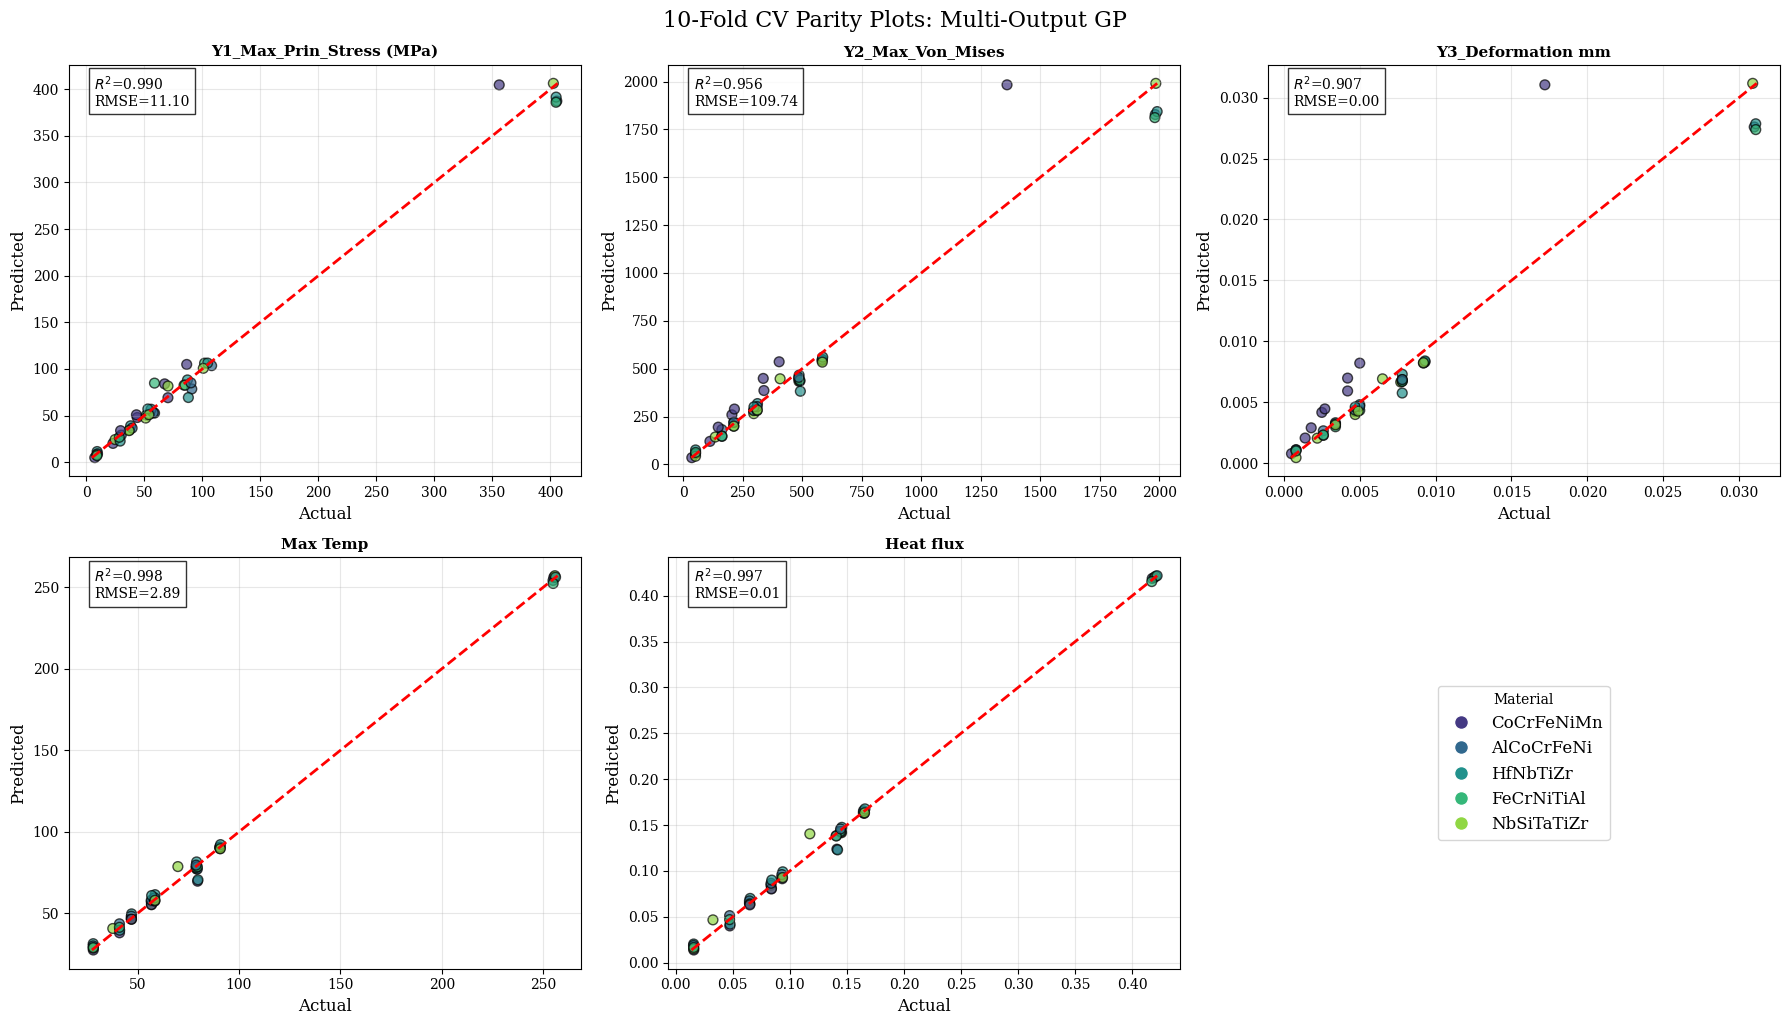

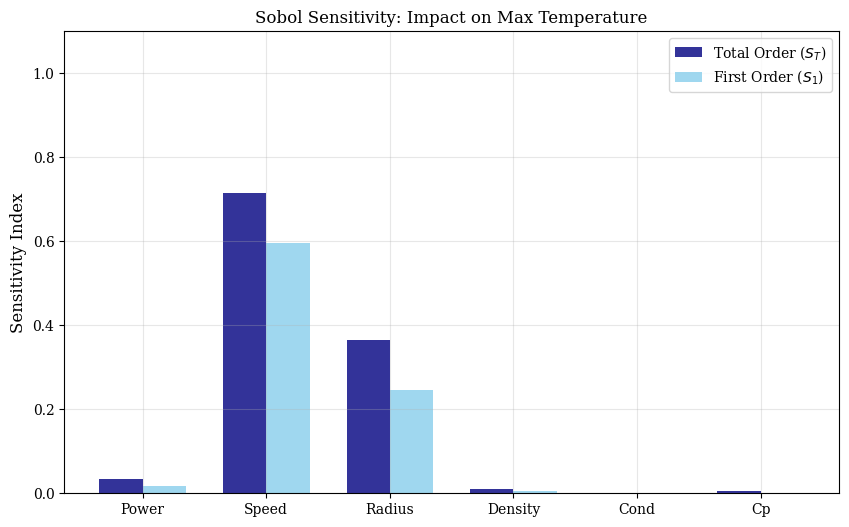

In [ ]:
# ==========================================
# INSTALL LIBRARIES (Run this once in Colab)
# ==========================================
# !pip install gpytorch SALib xgboost

import torch
import gpytorch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from SALib.sample import saltelli
from SALib.analyze import sobol

# Configuration for High-Quality Plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# ==========================================
# 1. DATA INGESTION
# ==========================================
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""

# Load and Clean
df = pd.read_csv(io.StringIO(csv_content))
df['Material'] = df['Material'].str.strip()
df_clean = df[(df['Y2_Max_Von_Mises'] > 1e-6) & (df['Heat flux'] > 1e-6)].copy()

# Physics Embedding
material_props = {
    'CoCrFeNiMn': [8250, 12.5, 425],
    'AlCoCrFeNi': [8000, 15.0, 445],
    'FeCrNiTiAl': [8100, 15.0, 435],
    'NbSiTaTiZr': [8350, 10.0, 405],
    'HfNbTiZr':   [8450, 8.5,  395]
}
props_df = pd.DataFrame(
    df_clean['Material'].map(material_props).tolist(),
    index=df_clean.index,
    columns=['Density', 'Conductivity', 'Cp']
)

# Final Feature Set
X_raw = pd.concat([df_clean[['Power_W/mm2', 'Speed_mm/s', 'Radius_mm']], props_df], axis=1)
y_raw = df_clean[['Y1_Max_Prin_Stress (MPa)', 'Y2_Max_Von_Mises', 'Y3_Deformation mm', 'Max Temp', 'Heat flux']]
output_names = y_raw.columns.tolist()

# ==========================================
# 2. MODEL DEFINITION (MOGP)
# ==========================================
class MOGP_Surrogate(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MOGP_Surrogate, self).__init__(train_x, train_y, likelihood)
        # Mean: Constant mean for each of the 5 tasks
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=5
        )
        # Covariance: ICM Kernel (Spatial Kernel x Task Kernel)
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.ScaleKernel(
                gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=6)
            ),
            num_tasks=5,
            rank=1 # Low-rank approximation for efficient task correlation
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

# ==========================================
# 3. VALIDATION LOOP (10-Fold CV)
# ==========================================
print("--- Running 10-Fold Cross-Validation ---")
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Store all Out-of-Sample predictions
y_preds_all = []
y_true_all = []
materials_all = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_raw)):
    # Split
    X_tr, X_te = X_raw.iloc[train_idx], X_raw.iloc[test_idx]
    y_tr, y_te = y_raw.iloc[train_idx], y_raw.iloc[test_idx]
    materials_all.extend(df_clean.iloc[test_idx]['Material'].values)

    # Scale
    X_scaler = MinMaxScaler().fit(X_tr)
    y_scaler = StandardScaler().fit(y_tr)

    X_tr_sc = torch.tensor(X_scaler.transform(X_tr), dtype=torch.float32)
    y_tr_sc = torch.tensor(y_scaler.transform(y_tr), dtype=torch.float32)
    X_te_sc = torch.tensor(X_scaler.transform(X_te), dtype=torch.float32)

    # Init GP
    likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=5)
    model = MOGP_Surrogate(X_tr_sc, y_tr_sc, likelihood)

    # Train
    model.train(); likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    # Optimization Loop (Silent)
    for _ in range(80):
        optimizer.zero_grad()
        output = model(X_tr_sc)
        loss = -mll(output, y_tr_sc)
        loss.backward()
        optimizer.step()

    # Predict
    model.eval(); likelihood.eval()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds_dist = likelihood(model(X_te_sc))
        preds_mean_sc = preds_dist.mean.numpy()

        # Unscale
        preds_real = y_scaler.inverse_transform(preds_mean_sc)
        y_preds_all.append(preds_real)
        y_true_all.append(y_te.values)

    print(f"Fold {fold+1}/10 Complete.")

# Concatenate Results
y_true_stack = np.vstack(y_true_all)
y_pred_stack = np.vstack(y_preds_all)

# Print Metrics
print("\n--- Validation Metrics (R2 Scores) ---")
for i, name in enumerate(output_names):
    score = r2_score(y_true_stack[:, i], y_pred_stack[:, i])
    print(f"{name}: {score:.4f}")

# ==========================================
# 4. GENERATE PDF: GP PARITY PLOTS (ALL 5)
# ==========================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Unique materials for coloring
unique_mats = list(set(materials_all))
colors = sns.color_palette("viridis", len(unique_mats))
mat_color_map = dict(zip(unique_mats, colors))
point_colors = [mat_color_map[m] for m in materials_all]

for i, ax in enumerate(axes):
    if i < 5:
        # Scatter Plot
        ax.scatter(y_true_stack[:, i], y_pred_stack[:, i], c=point_colors, s=50, alpha=0.7, edgecolors='k')

        # Ideal Line
        min_val = min(y_true_stack[:, i].min(), y_pred_stack[:, i].min())
        max_val = max(y_true_stack[:, i].max(), y_pred_stack[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

        # Labels
        ax.set_title(f"{output_names[i]}", fontsize=11, fontweight='bold')
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")

        # Metrics Annotation
        r2 = r2_score(y_true_stack[:, i], y_pred_stack[:, i])
        rmse = np.sqrt(mean_squared_error(y_true_stack[:, i], y_pred_stack[:, i]))
        ax.text(0.05, 0.9, f"$R^2$={r2:.3f}\nRMSE={rmse:.2f}", transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8))
    else:
        # Legend in the 6th empty slot
        ax.axis('off')
        from matplotlib.lines import Line2D
        legend_elements = [Line2D([0], [0], marker='o', color='w', label=m,
                          markerfacecolor=c, markersize=10) for m, c in mat_color_map.items()]
        ax.legend(handles=legend_elements, title="Material", loc='center', fontsize=12)

plt.tight_layout()
plt.suptitle("10-Fold CV Parity Plots: Multi-Output GP", fontsize=16, y=1.02)
plt.savefig("GP_Parity_Analysis.pdf", format='pdf', bbox_inches='tight', dpi=300)
print("\n>> Saved 'GP_Parity_Analysis.pdf'")

# ==========================================
# 5. SOBOL ANALYSIS & PDF
# ==========================================
print("\n--- Running Sobol Sensitivity Analysis (Max Temp) ---")

# 1. Retrain on Full Data
X_scaler = MinMaxScaler().fit(X_raw)
y_scaler = StandardScaler().fit(y_raw)
X_full_sc = torch.tensor(X_scaler.transform(X_raw), dtype=torch.float32)
y_full_sc = torch.tensor(y_scaler.transform(y_raw), dtype=torch.float32)

model_full = MOGP_Surrogate(X_full_sc, y_full_sc, likelihood)
model_full.train(); likelihood.train()
optimizer = torch.optim.Adam(model_full.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model_full)

for _ in range(150):
    optimizer.zero_grad()
    loss = -mll(model_full(X_full_sc), y_full_sc)
    loss.backward()
    optimizer.step()

# 2. Define Problem & Sample
problem = {
    'num_vars': 6,
    'names': ['Power', 'Speed', 'Radius', 'Density', 'Cond', 'Cp'],
    'bounds': [
        [50, 300], [5, 50], [0.8, 1.5], # Process
        [8000, 8500], [8.0, 16.0], [390, 450] # Physics
    ]
}
param_values = saltelli.sample(problem, 2048)

# 3. Batch Prediction
model_full.eval(); likelihood.eval()
Y_preds = []
batch_size = 1000
input_tensor = torch.tensor(X_scaler.transform(param_values), dtype=torch.float32)

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    for i in range(0, len(input_tensor), batch_size):
        batch = input_tensor[i:i+batch_size]
        # Index 3 is 'Max Temp'
        out = likelihood(model_full(batch)).mean[:, 3].numpy()
        # Unscale
        out_real = out * y_scaler.scale_[3] + y_scaler.mean_[3]
        Y_preds.append(out_real)

Y_flat = np.concatenate(Y_preds)
Si = sobol.analyze(problem, Y_flat)

# 4. Plot Sobol Indices
plt.figure(figsize=(10, 6))
indices = np.arange(len(problem['names']))
width = 0.35

plt.bar(indices - width/2, Si['ST'], width, label='Total Order ($S_T$)', color='navy', alpha=0.8)
plt.bar(indices + width/2, Si['S1'], width, label='First Order ($S_1$)', color='skyblue', alpha=0.8)

plt.ylabel('Sensitivity Index')
plt.title('Sobol Sensitivity: Impact on Max Temperature')
plt.xticks(indices, problem['names'])
plt.legend()
plt.ylim(0, 1.1)

plt.savefig("Sobol_Sensitivity_MaxTemp.pdf", format='pdf', bbox_inches='tight', dpi=300)
print(">> Saved 'Sobol_Sensitivity_MaxTemp.pdf'")

**Save results**

In [ ]:
import joblib

# --- COMPLIANCE EXPORT ---
# Bundle the trained pipeline and the physics database into one file.
export_package = {
    'model': pipeline,                  # The fitted StackingRegressor
    'materials': material_props,        # The dictionary: {'CoCrFeNiMn': [8250, ...]}
    'input_columns': list(X_train.columns), # Use 'X_train' instead of 'X'
    'target_names': list(y_train.columns)   # Target variable names
}

joblib.dump(export_package, 'digital_twin_assets.pkl')
print("SUCCESS: Model and Physics Data exported to 'digital_twin_assets.pkl'")

SUCCESS: Model and Physics Data exported to 'digital_twin_assets.pkl'
